## Model LLama 3.2 vision

In [3]:
pip install transformers==4.45.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [4]:
!pip install bitsandbytes==0.44.1
!pip install accelerate==0.34.2
!pip install accelerate==0.34.2
!pip install einops==0.8.0
!pip install tensorflow-cpu==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.4 MB/s eta 0:00:00
  Using cached tensorflow_cpu-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow_cpu-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (221.2 MB)


In [1]:
import torch
import os
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoModelForCausalLM, AutoProcessor, GenerationConfig

In [2]:
model_id = "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit"
model = MllamaForConditionalGeneration.from_pretrained(
        model_id,
        torch_dtype=torch.bfloat16,
        device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


model.safetensors.index.json:   0%|          | 0.00/385k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

In [3]:
MAX_OUTPUT_TOKENS = 2048
MAX_IMAGE_SIZE = (1120, 1120)


In [4]:
def describe_image(image, user_prompt, temperature=0.4, top_k=40, top_p=0.9, max_tokens=128):
    image = image.resize(MAX_IMAGE_SIZE)
    cleaned_output = ""

    prompt = f"<|image|><|begin_of_text|>{user_prompt} Answer:"
    inputs = processor(image, prompt, return_tensors="pt").to(model.device)
    output = model.generate(
            **inputs,
            max_new_tokens=min(max_tokens, MAX_OUTPUT_TOKENS),
            temperature=temperature,
            top_k=top_k,
            top_p=top_p
    )
    raw_output = processor.decode(output[0])
    cleaned_output = raw_output.replace("<|image|><|begin_of_text|>", "").strip().replace(" Answer:", "")

    return cleaned_output

In [6]:
!wget "https://journalofmusic.com/listing/11-09-23/picture"

--2024-10-05 02:01:41--  https://journalofmusic.com/listing/11-09-23/picture
Resolving journalofmusic.com (journalofmusic.com)... 172.67.146.2, 104.21.10.163, 2606:4700:3032::ac43:9202, ...
Connecting to journalofmusic.com (journalofmusic.com)|172.67.146.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘picture’

picture                 [ <=>                ] 120.77K  --.-KB/s    in 0.04s   

2024-10-05 02:01:42 (3.32 MB/s) - ‘picture’ saved [123665]



In [7]:
ls

picture  sample_data/


In [9]:
from PIL import Image

image_path = "/content/sample_data/images.jpg"
image = Image.open(image_path)



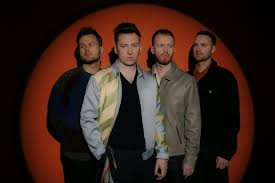

In [10]:
image

In [11]:
user_prompt = "How many people in the picture?"
response = describe_image(image, user_prompt)

In [12]:
response

'How many people in the picture? 4. There are 4 people in the picture. They are standing in front of an orange circle. The background is black. The people are wearing dark clothing. The people are standing in front of an orange circle. The background is black. The people are wearing dark clothing. The people are standing in front of an orange circle. The background is black. The people are wearing dark clothing. The people are standing in front of an orange circle. The background is black. The people are wearing dark clothing. The people are standing in front of an orange circle. The background is black. The people are wearing dark clothing. The people'